In [171]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline
plt.rc('text',usetex=True)

model = 'LV'
# model = 'BioPath'

# Valid values for LV
n = 34
# n = 51


# Valid values for BioPath
# n = 14
# n = 28

prefixes = {'LV': ['GON','RBF','RK3G'],'BioPath':['GON','MLP','RK3G']}



In [172]:
datasets = ['par/{}/n{}/{}{}.csv'.format(model,n,i,n) for i in prefixes[model]]
print datasets

['par/LV/n34/GON34.csv', 'par/LV/n34/RBF34.csv', 'par/LV/n34/RK3G34.csv']


In [173]:
parameters = {'LV': ['alpha','beta','gamma','delta'],
             'BioPath':['k_1','k_2','k_3','k_4','k_5/k_6']}
true_values = {'alpha':0.2,'beta':0.35,'gamma':0.7,'delta':0.4,'k_1':0.07,'k_2':0.6,'k_3':0.05,'k_4':0.3,'k_5/k_6':0.017/0.3}

In [174]:
#Load all the datasets
values = {}
for f in datasets:
    values[f] = np.genfromtxt(f,delimiter=',')
    if model == 'BioPath':
        values[f][:,4] = values[f][:,4]/values[f][:,5]
nreps, npars = values[datasets[0]].shape

    

npars = len(parameters[model])
nfiles = len(datasets)
print nreps,npars,nfiles


50 4 3


$\displaystyle\alpha$
$\displaystyle\beta$
$\displaystyle\gamma$
$\displaystyle\delta$


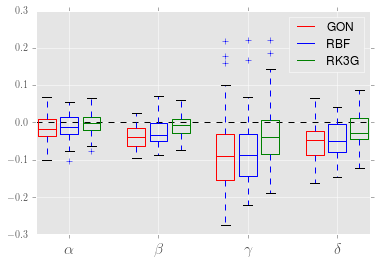

In [175]:
d = np.zeros((nreps,nfiles*npars),np.double)
pos = 0
plt.figure()
ax = plt.axes()
plt.hold(True)

tickpos = []
positions = []
pos = 0
d = np.zeros((nreps,nfiles*npars),np.double)
for i,p in enumerate(parameters[model]):
    for j,f in enumerate(datasets):
        d[:,pos] = values[f][:,i] - true_values[p]
        pos+=1
if model == 'LV':        
    positions = [1,2,3,5,6,7,9,10,11,13,14,15]
    ticks = [2,6,10,14]
else:
    positions = [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19]
    ticks = [2,6,10,14,18]

    
plt.plot([0.5,positions[-1]+0.5],[0,0],'k--')
bp = plt.boxplot(d,positions = positions,widths=0.8)

model_cols = {0:'red',1:'blue',2:'green'}
for j in model_cols:
    for i in np.arange(j,3*npars,3):
        for q in ['boxes','medians']:
            plt.setp(bp[q][i],color=model_cols[j],lw=1.0)
        

parnames = []
for p in parameters[model]:
    if model == 'LV':
        s = r"$\displaystyle\{}$".format(p)
    else:
        s = r"$\displaystyle {}$".format(p)
    print s
    parnames.append(s)
plt.xticks(ticks,parnames,fontsize=16)
plt.ylim([-0.3,0.3])


import matplotlib.lines as mlines
model1 = mlines.Line2D([], [], color='red',
                          markersize=15, label=prefixes[model][0])
model2 = mlines.Line2D([], [], color='blue',
                          markersize=15, label=prefixes[model][1])

model3 = mlines.Line2D([], [], color='green',
                          markersize=15, label=prefixes[model][2])


plt.legend(handles=[model1,model2,model3])

filename = "boxes_{}_n{}.pdf".format(model,n)
plt.savefig(filename)
        
    

<h2>Stats tests</h2>

In [176]:
from scipy.stats import ttest_rel,ttest_1samp

In [185]:
to_compare = [1,2]

for i,p in enumerate(parameters[model]):
    t,pv = ttest_1samp(np.abs(values[datasets[to_compare[0]]][:,i]-true_values[p])-np.abs(values[datasets[to_compare[1]]][:,i]-true_values[p]),0)
    print "Parameter {}, p-value {}".format(p,pv)

Parameter alpha, p-value 0.024796647416
Parameter beta, p-value 0.000540939764889
Parameter gamma, p-value 0.000478364500066
Parameter delta, p-value 0.000575026970769
